# Modflow2NetCDF



In [1]:
# Freyberg config file
freyberg_config = '../../modflow2netcdf/tests/resources/freyberg/freyberg.geo'
with open(freyberg_config) as f:
    print f.read()

[general]
precision = single

[space]
epsg = 4326
origin_x = -105.243933
origin_y = 40.47377
rotation = 0
units = ft

[time]
units = days
base = 1970-01-01

[output]
head = freyberg.fhd
cbud = freyberg.cbb
headtype = formatted



In [2]:
# Freyberg NAM file
freyberg_nam = '../../modflow2netcdf/tests/resources/freyberg/freyberg.nam'
with open(freyberg_nam) as f:
    print f.read()

LIST 7 freyberg.lst
BAS6  1 freyberg.bas
DIS  29 freyberg.dis
LPF 11 freyberg.lpf
WEL 12 freyberg.wel
RIV 14 freyberg.riv
RCH 18 freyberg.rch
OC  22 freyberg.oc
PCG 19 freyberg.pcg
DATA(BINARY) 50 freyberg.cbb
DATA(BINARY) 30 freyberg.hds
DATA(BINARY) 31 freyberg.ddn



In [3]:
# Load MODFLOW output files
from modflow2netcdf.mfnetcdf import ModflowToNetCDF
freyberg_path = '../../modflow2netcdf/tests/resources/freyberg'
mf = ModflowToNetCDF(freyberg_nam, config_file=freyberg_config, exe_name="mf2005", verbose=False, model_ws=freyberg_path)


Creating new model with name: freyberg
--------------------------------------------------

index.html
   DIS  package load...success
index.html
   BAS6 package load...success
   LIST package load...skipped
index.html
   LPF  package load...success
index.html
   WEL  package load...success
   DATA(BINARY) file load...skipped
      freyberg.cbb
index.html
   RIV  package load...success
index.html
   RCH  package load...success
index.html
   PCG  package load...success
index.html
   OC   package load...success
   DATA(BINARY) file load...skipped
      freyberg.hds
   DATA(BINARY) file load...skipped
      freyberg.ddn


   The following 8 packages were successfully loaded.
      freyberg.dis
      freyberg.bas
      freyberg.lpf
      freyberg.wel
      freyberg.riv
      freyberg.rch
      freyberg.pcg
      freyberg.oc
   The following 1 packages were not loaded.
      freyberg.lst


Calculating model grid points in output coordinate system.


In [4]:
# Save NetCDF output
freyberg_output = 'temp_freyberg_output.nc'
_ = mf.save_netcdf(output_file=freyberg_output)

Processing constant_head
Returning CONSTANT HEAD as a numpy masked array of size (14020)
Saved constant_head as 4-D variable.
Processing flow_right_face
Returning FLOW RIGHT FACE as an array of shape (1, 40, 20)
Saved flow_right_face as 4-D variable.
Processing flow_front_face
Returning FLOW FRONT FACE as an array of shape (1, 40, 20)
Saved flow_front_face as 4-D variable.
Processing wells
Returning WELLS as a list array of shape (1, 40, 20)
Saved wells as 4-D variable.
Processing river_leakage
Returning RIVER LEAKAGE as a list array of shape (1, 40, 20)
Saved river_leakage as 4-D variable.
Processing recharge
Returning RECHARGE as a numpy masked array of size (14020)
Saved recharge as 4-D variable.


In [5]:
# Load NetCDF output
import netCDF4
nc = netCDF4.Dataset(freyberg_output)

In [6]:
# List variables
for variable_name in nc.variables:
    print nc.variables.get(variable_name).name

crs
latitude
longitude
time
elevation
layer
delc
delr
VerticalTransform
head
constant_head
flow_right_face_centered
flow_right_face
flow_front_face_centered
flow_front_face
wells
river_leakage
recharge


In [7]:
# Save some common variables
x = nc.variables.get("longitude")[:]
y = nc.variables.get("latitude")[:]

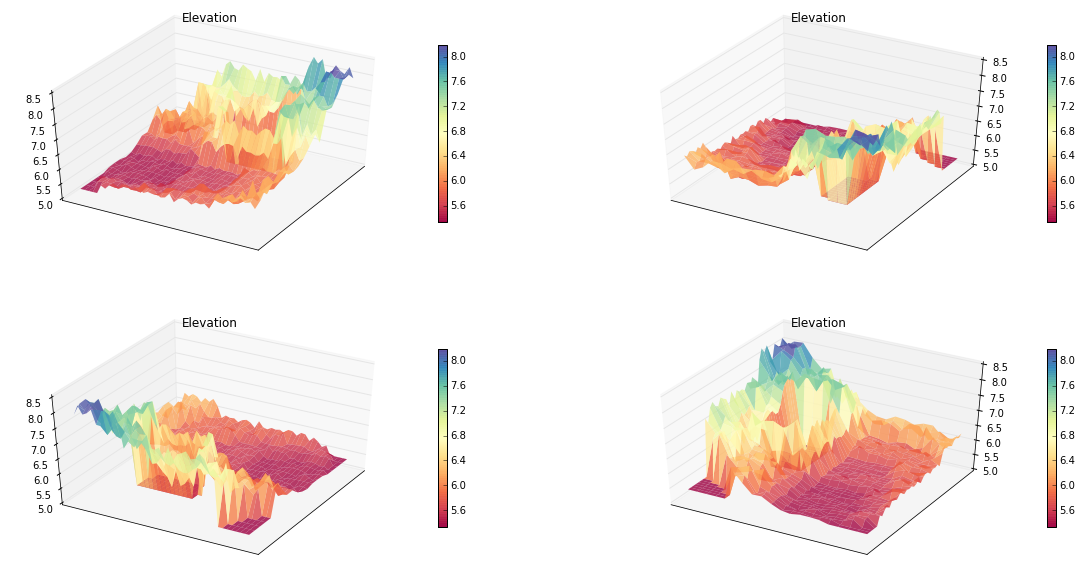

In [8]:
# Plot the Elevation of Layer 0
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(20,10))

z = nc.variables.get("elevation")[0, :, :]

ax = fig.add_subplot(2, 2, 1, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, cmap=cm.Spectral, alpha=0.80)
cb = fig.colorbar(p, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Elevation')
ax.view_init(40, 30)

ax = fig.add_subplot(2, 2, 2, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, cmap=cm.Spectral, alpha=0.80)
cb = fig.colorbar(p, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Elevation')
ax.view_init(40, 120)

ax = fig.add_subplot(2, 2, 3, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, cmap=cm.Spectral, alpha=0.80)
cb = fig.colorbar(p, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Elevation')
ax.view_init(40, 210)

ax = fig.add_subplot(2, 2, 4, projection='3d')
p = ax.plot_surface(x, y, z, rstride=1, cstride=1, linewidth=0, cmap=cm.Spectral, alpha=0.80)
cb = fig.colorbar(p, shrink=0.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Elevation')
ax.view_init(40, 300)

In [9]:
# Helper plot methods
mf.to_plot(variable='heads', level=0, time=0)

Processing constant_head
Returning CONSTANT HEAD as a numpy masked array of size (14020)
Saved constant_head as 4-D variable.
Processing flow_right_face
Returning FLOW RIGHT FACE as an array of shape (1, 40, 20)
Saved flow_right_face as 4-D variable.
Processing flow_front_face
Returning FLOW FRONT FACE as an array of shape (1, 40, 20)
Saved flow_front_face as 4-D variable.
Processing wells
Returning WELLS as a list array of shape (1, 40, 20)
Saved wells as 4-D variable.
Processing river_leakage
Returning RIVER LEAKAGE as a list array of shape (1, 40, 20)
Saved river_leakage as 4-D variable.
Processing recharge
Returning RECHARGE as a numpy masked array of size (14020)
Saved recharge as 4-D variable.


WindowsError: [Error 32] The process cannot access the file because it is being used by another process: 'c:\\users\\spauli~1\\appdata\\local\\temp\\1\\tmp_47imt.nc'

Processing constant_head
Returning CONSTANT HEAD as a numpy masked array of size (14020)
Saved constant_head as 4-D variable.
Processing flow_right_face
Returning FLOW RIGHT FACE as an array of shape (1, 40, 20)
Saved flow_right_face as 4-D variable.
Processing flow_front_face
Returning FLOW FRONT FACE as an array of shape (1, 40, 20)
Saved flow_front_face as 4-D variable.
Processing wells
Returning WELLS as a list array of shape (1, 40, 20)
Saved wells as 4-D variable.
Processing river_leakage
Returning RIVER LEAKAGE as a list array of shape (1, 40, 20)
Saved river_leakage as 4-D variable.
Processing recharge
Returning RECHARGE as a numpy masked array of size (14020)
Saved recharge as 4-D variable.


<module 'matplotlib.pyplot' from 'C:\Python27\ArcGISx6410.2\lib\site-packages\matplotlib\pyplot.pyc'>

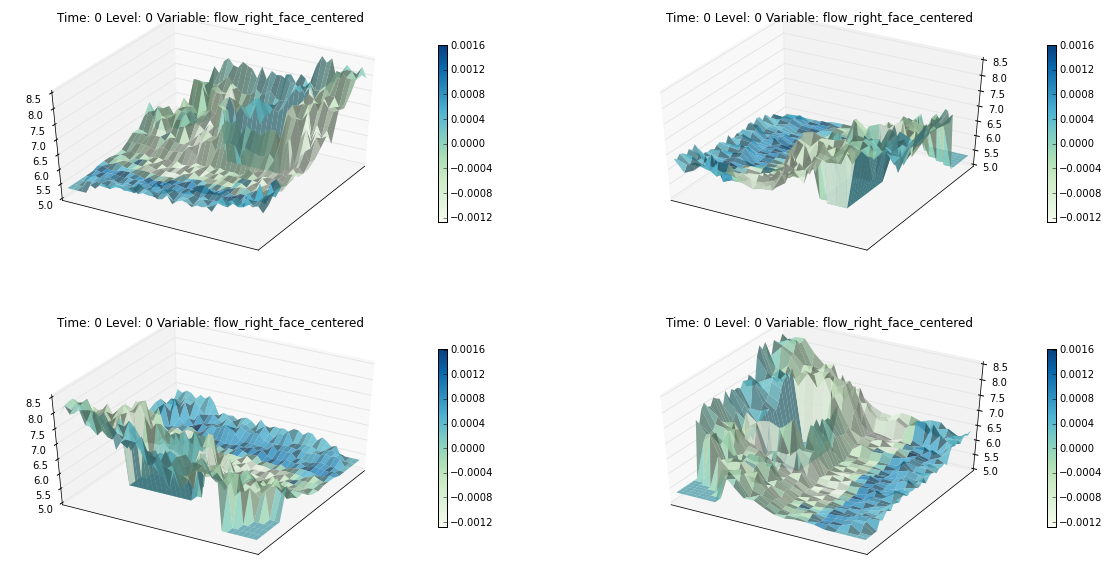

In [10]:
mf.to_plot(variable='flow_right_face_centered', level=0, time=0, colormap=cm.GnBu)